In [96]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from  google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [98]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [99]:
type (X_train)

numpy.ndarray

In [100]:
print ( X_train.shape)
print ( Y_train.shape)
print ( X_test.shape)
print ( Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [101]:
print(X_train[10])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [102]:
X_train = X_train/255
X_test = X_test/255

In [103]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [104]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [105]:
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8490 - loss: 0.5184
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9542 - loss: 0.1512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9684 - loss: 0.1060
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9751 - loss: 0.0830
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9802 - loss: 0.0677
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0576
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9857 - loss: 0.0487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0412
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9887 - loss: 0.0363
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9901 - loss: 0.0309


In [106]:
loss,accruacy = model.evaluate(X_test,Y_test)
print(accruacy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9673 - loss: 0.1272
0.9715999960899353


In [107]:
print(X_test.shape)

(10000, 28, 28)


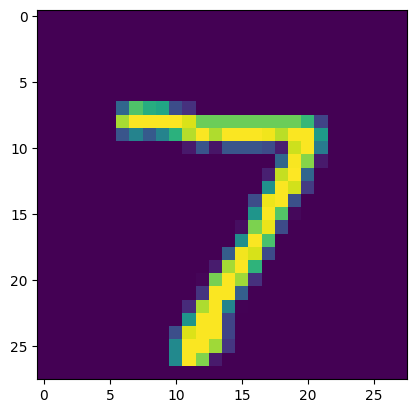

In [108]:
plt.imshow(X_test[0])
plt.show()

In [109]:
print(Y_test[0])

7


In [110]:
Y_pred= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [111]:
print(Y_pred[0])

[2.4047799e-03 6.4311002e-04 4.9644154e-01 9.8440695e-01 1.1103342e-09
 2.9962262e-04 2.3469090e-13 9.9999928e-01 3.2903928e-01 9.7661483e-01]


In [112]:
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [113]:
Y_pred_labels= [np.argmax(i) for i in Y_pred ]
Y_pred_labels= [int(label)for label in Y_pred_labels]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [114]:
print(Y_test[4])

4


In [115]:
conf_matrix= confusion_matrix(Y_test,Y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 961    0    1    1    3    0    5    0    2    7]
 [   0 1114    2    2    1    0    3    2   11    0]
 [   5    1  989    7    2    1    5   12    8    2]
 [   0    0    6  977    0    3    0    3    6   15]
 [   0    0    3    0  956    0    9    3    3    8]
 [   4    0    0    7    3  863    6    3    4    2]
 [   5    2    2    0    4    4  935    0    6    0]
 [   1    0    8    0    1    0    0 1007    1   10]
 [   3    1    5    6    5    2    4    3  939    6]
 [   1    2    0    5    8    3    2    7    6  975]], shape=(10, 10), dtype=int32)


Text(0.5, 23.52222222222222, 'Predicted Labels')

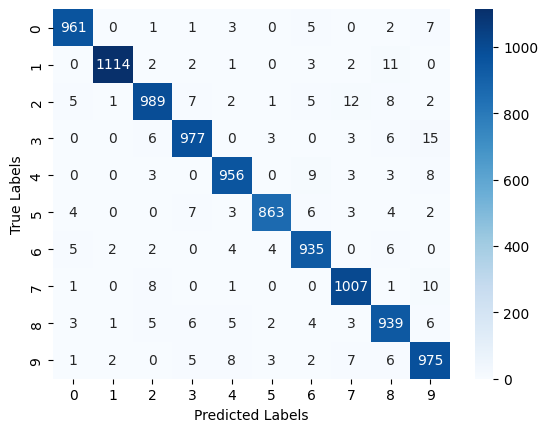

In [116]:
plt.figsizeq=(15,7)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [117]:
input_image_path= "/content/MNIST_digit (1).png"
input_image= cv2.imread(input_image_path)

In [118]:
type(input_image)

numpy.ndarray

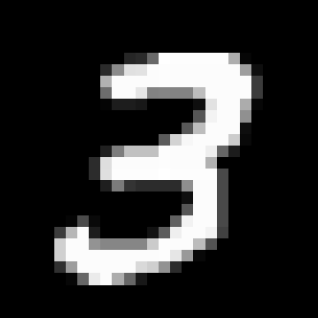

In [120]:
cv2_imshow(input_image)



In [121]:
input_image.shape

(318, 318, 3)

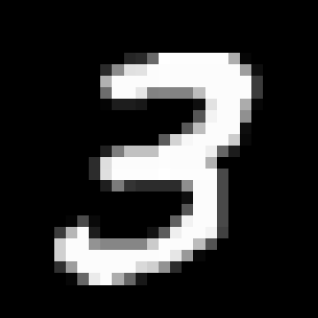

In [122]:
grayscale= cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)

In [123]:
grayscale.shape

(318, 318)

In [127]:
input_image_resize = cv2.resize(grayscale, (28,28))
cv2_imshow(input_image_resize)

In [132]:
input_image_resize.shape

(28, 28)

In [133]:
input_image_resize= input_image_resize/255

In [136]:
image_reshape= np.reshape(input_image_resize,[1,28,28])

In [137]:
input_prediciton = model.predict(image_reshape)
print(input_prediciton)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[3.50750489e-13 1.90500566e-03 1.21474504e-01 1.00000000e+00
  2.09794083e-13 1.46940976e-01 1.42709884e-16 4.25436068e-03
  4.78058644e-02 9.99295413e-01]]


In [140]:
input_predict_label= np.argmax(input_prediciton)
print(input_predict_label)

3
